In [ ]:
# ROC Curves
# The Receiver Operating Characteristic (ROC) Curve is a way to visualize the performance of a classification model at varying
# thresholds. The ROC Curve is a plot of the true positive rate (TPR) vs. the false positive rate (FPR). The TPR is the percentage of true
# positives out of all actual positives while the FPR is the percentage of false positives out of all actual negatives.

# AUC
# The Area Under the ROC Curve (AUC) is a way to quantify how well-defined our classes are. The higher the AUC, the better your
# classifier is doing at predicting the difference between the classes.


In [17]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.metrics import roc_auc_score

In [18]:
# Load the data
df = pd.read_csv('C:/Users/User/Desktop/modifiedIris2Classes.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


In [56]:
# Build a logistic regression classifier
# Split into X and y
X = df.drop(columns = 'target')
y = df['target']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Make an instance of the model
logreg = LogisticRegression(C = .001)
# Scaling logistic regression
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train, y_train)

<bound method Pipeline.fit of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.001))])>


In [20]:
# Calculate AUC and visualize ROC

# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, logreg_pipe.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg_pipe.predict_proba(X_test)[:,1])}')

Training AUC: 0.9565527065527065
Testing AUC: 0.987012987012987


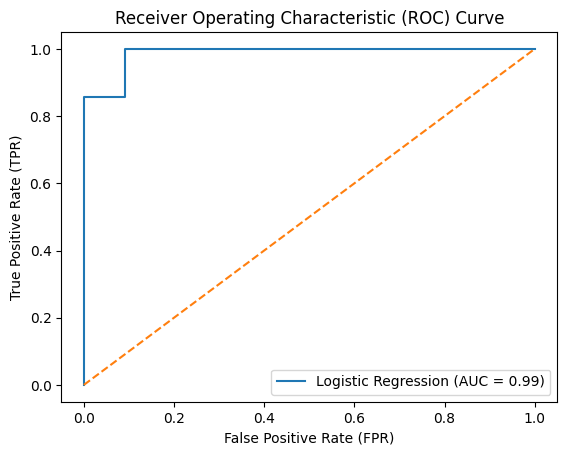

In [61]:
# Make predictions on the test data using the trained logistic regression model
y_pred_prob = logreg_pipe.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Create the ROC curve display
roc_display = RocCurveDisplay.from_predictions(y_test, y_pred_prob, name='Logistic Regression')

# Plot the ROC curve
# roc_display.plot()

# Customize the plot (optional)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')


# Show the plot
plt.show()